샘플 이미지를 생성합니다.


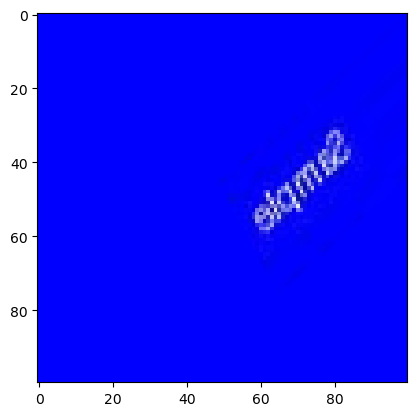

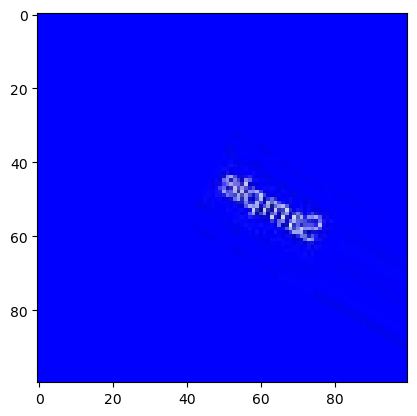

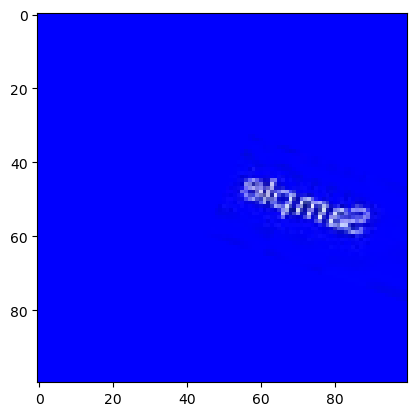

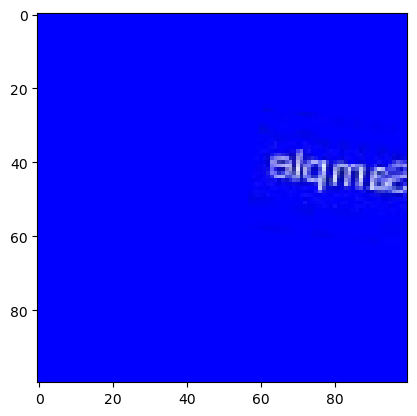

In [5]:
#############################################################
# [1] 데이터 처리 및 변환
# [1-1] 데이터 증강 (Data Augmentation)
# 이미지 데이터
#############################################################

import subprocess
import sys
import importlib

# 필요한 패키지를 확인하고 설치하는 함수
def install_and_import(package_name, import_name=None):
    if not import_name:
        import_name = package_name
    try:
        importlib.import_module(import_name)
    except ImportError:
        print(f"{package_name} 패키지가 설치되지 않았습니다. 설치를 진행합니다...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
    finally:
        globals()[import_name] = importlib.import_module(import_name)

# 필요한 패키지 설치 및 임포트
required_packages = {
    "tensorflow": "tensorflow",
    "matplotlib": "matplotlib",
    "Pillow": "PIL"
}

for package_name, import_name in required_packages.items():
    install_and_import(package_name, import_name)

# TensorFlow 및 기타 모듈 사용
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from PIL import Image, ImageDraw

# 샘플 이미지 확인 또는 생성
sample_image_path = "sample_image.jpg"
try:
    img = load_img(sample_image_path)  # 이미지 로드
except FileNotFoundError:
    print("샘플 이미지를 생성합니다.")
    # 이미지 생성
    img = Image.new("RGB", (100, 100), color="blue")
    draw = ImageDraw.Draw(img)
    draw.text((10, 40), "Sample", fill="white")
    img.save(sample_image_path)  # 생성된 이미지 저장
    img = load_img(sample_image_path)

# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=40,         # 최대 40도 회전
    width_shift_range=0.2,     # 너비 방향으로 최대 20% 이동
    height_shift_range=0.2,    # 높이 방향으로 최대 20% 이동
    shear_range=0.2,           # 전단 변환
    zoom_range=0.2,            # 확대/축소
    horizontal_flip=True,      # 좌우 반전
    fill_mode="nearest"        # 빈 영역을 채우는 방법
)

# 이미지를 배열로 변환
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# 증강된 이미지 생성 및 시각화
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(array_to_img(batch[0]))  # 증강 이미지 시각화
    i += 1
    if i % 4 == 0:  # 4개의 증강 이미지만 생성
        break
plt.show()


=== 원본 데이터 성능 ===
Mean Squared Error: 2.6148
R2 Score: 0.9546

=== 증강 데이터 성능 ===
Mean Squared Error: 1.9914
R2 Score: 0.9630


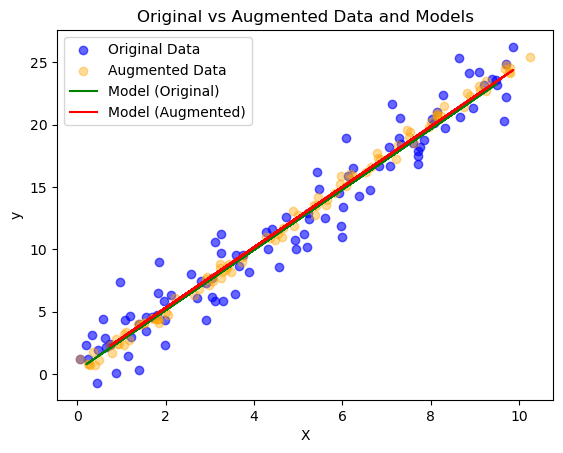

In [13]:
#############################################################
# [1] 데이터 처리 및 변환
# [1-1] 데이터 증강 (Data Augmentation)
# 숫자 데이터 : 노이즈와 비선형성 추가
#############################################################
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 원본 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Target with noise

# 원본 데이터프레임
original_data = pd.DataFrame({"X": X.flatten(), "y": y})

# 데이터 증강: 노이즈와 비선형성 추가
augmented_X = X + np.random.randn(100, 1) * 0.2  # 작은 노이즈 추가
augmented_y = 2.5 * augmented_X.flatten() + np.random.randn(100) * 0.5 + 0.2 * np.sin(augmented_X.flatten())  # 비선형성 추가
augmented_data = pd.DataFrame({"X": augmented_X.flatten(), "y": augmented_y})

# 데이터 병합
combined_data = pd.concat([original_data, augmented_data], ignore_index=True)

# 데이터 분리: 원본 데이터
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    original_data["X"].values.reshape(-1, 1), original_data["y"], test_size=0.2, random_state=42
)

# 데이터 분리: 증강 데이터
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    combined_data["X"].values.reshape(-1, 1), combined_data["y"], test_size=0.2, random_state=42
)

# 모델 학습: 원본 데이터
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

# 모델 학습: 증강 데이터
model_aug = LinearRegression()
model_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = model_aug.predict(X_test_aug)

# 성능 평가
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

mse_aug = mean_squared_error(y_test_aug, y_pred_aug)
r2_aug = r2_score(y_test_aug, y_pred_aug)

# 결과 출력
print("=== 원본 데이터 성능 ===")
print(f"Mean Squared Error: {mse_orig:.4f}")
print(f"R2 Score: {r2_orig:.4f}")

print("\n=== 증강 데이터 성능 ===")
print(f"Mean Squared Error: {mse_aug:.4f}")
print(f"R2 Score: {r2_aug:.4f}")

# 시각화
plt.scatter(original_data["X"], original_data["y"], label="Original Data", color="blue", alpha=0.6)
plt.scatter(augmented_data["X"], augmented_data["y"], label="Augmented Data", color="orange", alpha=0.4)
plt.plot(X_test_orig, y_pred_orig, label="Model (Original)", color="green")
plt.plot(X_test_aug, y_pred_aug, label="Model (Augmented)", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Original vs Augmented Data and Models")
plt.legend()
plt.show()


In [29]:
#############################################################
# [1] 데이터 처리 및 변환
# [1-2] 교차 검증 (Cross-Validation) + 데이터증강
#############################################################
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 데이터 로드
data = load_wine()
X, y = data.data, data.target

# 데이터를 학습 데이터와 새로운 테스트 데이터로 분리
X_train, X_new, y_train, y_new = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 증강: 노이즈 추가 및 특성 변형
np.random.seed(42)
noise = np.random.normal(0, 0.2, X_train.shape)  # 평균 0, 표준편차 0.2인 노이즈
X_augmented = X_train + noise  # 노이즈 추가
y_augmented = y_train  # 레이블은 동일

# 증강 데이터 합치기
X_combined = np.vstack((X_train, X_augmented))
y_combined = np.hstack((y_train, y_augmented))

# 기본 모델 생성
model = RandomForestClassifier(random_state=42)

# 교차 검증 없이 학습 및 새로운 데이터 평가 (기본 데이터)
model.fit(X_train, y_train)
new_predictions = model.predict(X_new)
accuracy_new_data = accuracy_score(y_new, new_predictions)

# 교차 검증 (기본 데이터)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_without_augmentation = cross_val_score(model, X_train, y_train, cv=kf)

# 교차 검증 (증강 데이터 포함)
scores_with_augmentation = cross_val_score(model, X_combined, y_combined, cv=kf)

# 데이터 스케일링 포함한 파이프라인 구성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 하이퍼파라미터 튜닝 (증강 데이터 포함)
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_combined, y_combined)

# 최적 모델로 교차 검증
best_model = grid_search.best_estimator_
scores_with_tuning = cross_val_score(best_model, X_combined, y_combined, cv=kf)

# 결과 출력
print("=== 새로운 데이터로 평가 (기본 데이터) ===")
print(f"새로운 데이터 정확도: {accuracy_new_data:.4f}")

print("\n=== 기본 데이터 교차 검증 결과 ===")
print(f"교차 검증 점수 (기본 데이터): {scores_without_augmentation}")
print(f"평균 교차 검증 점수: {scores_without_augmentation.mean():.4f}")

print("\n=== 증강 데이터 포함 교차 검증 결과 ===")
print(f"교차 검증 점수 (증강 데이터 포함): {scores_with_augmentation}")
print(f"평균 교차 검증 점수: {scores_with_augmentation.mean():.4f}")

print("\n=== 하이퍼파라미터 튜닝 결과 (증강 데이터 포함) ===")
print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최적 교차 검증 점수: {grid_search.best_score_:.4f}")

print("\n=== 최적 모델 교차 검증 점수 (증강 데이터 포함) ===")
print(f"교차 검증 점수: {scores_with_tuning}")
print(f"평균 교차 검증 점수: {scores_with_tuning.mean():.4f}")


=== 새로운 데이터로 평가 (기본 데이터) ===
새로운 데이터 정확도: 1.0000

=== 기본 데이터 교차 검증 결과 ===
교차 검증 점수 (기본 데이터): [0.93103448 0.96551724 1.         1.         1.        ]
평균 교차 검증 점수: 0.9793

=== 증강 데이터 포함 교차 검증 결과 ===
교차 검증 점수 (증강 데이터 포함): [0.96491228 1.         0.96491228 0.98245614 0.98214286]
평균 교차 검증 점수: 0.9789

=== 하이퍼파라미터 튜닝 결과 (증강 데이터 포함) ===
최적 파라미터: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
최적 교차 검증 점수: 0.9895

=== 최적 모델 교차 검증 점수 (증강 데이터 포함) ===
교차 검증 점수: [0.96491228 1.         0.96491228 0.98245614 0.98214286]
평균 교차 검증 점수: 0.9789


In [47]:
#############################################################
# [1] 데이터 처리 및 변환
# [1-3] 데이터 스케일링 (Data Scaling)
# MinMaxScaler : 데이터를 특정 범위(기본값: [0, 1])로 정규화
# 𝑋 : 원본 데이터 값
# 𝑋_{min}  : 각 열의 최소값
# 𝑋_{max}  : 각 열의 최대값
# 𝑋′ : 변환된 데이터 값

# 𝑋′ = (𝑋 - 𝑋_{min}) / (𝑋_{max} - 𝑋_{min})
#############################################################
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 출력 형식 설정 (소수점 이하 4자리까지)
np.set_printoptions(precision=4, suppress=True)

# 데이터 생성
X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

# 인위적으로 특성의 스케일 차이를 크게 만듦
X[:, 0] *= 1    # 첫 번째 특성: 0~1
X[:, 1] *= 100  # 두 번째 특성: 0~100
X[:, 2] *= 1000 # 세 번째 특성: 0~1000

print("원본 데이터 (일부):\n", X[:5])

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN 모델 생성
knn = KNeighborsClassifier()

# 1. 원본 데이터로 평가
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# 2. 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n스케일링된 데이터 (훈련 세트 일부):\n", X_train_scaled[:5])

# 스케일링된 데이터 학습 및 평가
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 결과 출력
print("\n=== 평가 결과 ===")
print(f"원본 데이터 테스트 정확도: {accuracy_original:.4f}")
print(f"스케일링된 데이터 테스트 정확도: {accuracy_scaled:.4f}")



원본 데이터 (일부):
 [[  -1.8306   -9.534  -654.0757    0.7241   -0.1813]
 [   0.2603    8.0151 -413.4652   -1.2733    1.4826]
 [  -1.3796    9.8744 -971.6567   -0.0728   -1.5796]
 [  -0.9981  -16.1506 1051.9476    2.3985    2.1207]
 [  -0.3696  122.3565  621.5719    0.0128   -1.4224]]

스케일링된 데이터 (훈련 세트 일부):
 [[0.5246 0.7534 0.5159 0.7898 0.714 ]
 [0.6738 0.2881 0.6199 0.4736 0.4592]
 [0.3458 0.3688 0.2804 0.1617 0.5876]
 [0.3992 0.5641 0.541  0.6432 0.4749]
 [0.5227 0.4134 0.4271 0.1323 0.6014]]

=== 평가 결과 ===
원본 데이터 테스트 정확도: 0.8480
스케일링된 데이터 테스트 정확도: 0.9360


In [55]:
#############################################################
# [1] 데이터 처리 및 변환
# [1-4] 데이터 불균형 처리 (Handling Imbalanced Data)
# SMOTE(Synthetic Minority Over-sampling Technique)
# : 소수 클래스의 샘플을 기반으로 가상의 샘플을 생성하여 클래스 불균형을 해결
#############################################################
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import pandas as pd

# 극단적인 불균형 데이터 생성
X, y = make_classification(
    n_classes=2,          # 이진 분류
    class_sep=2,          # 클래스 간 분리 정도
    weights=[0.005, 0.995], # 클래스 비율: 0.5% vs 99.5%
    n_informative=3,      # 정보가 있는 독립 변수 3개
    n_redundant=1,        # 중복된 독립 변수 1개
    flip_y=0,             # 라벨 뒤집기 비율 없음
    n_features=5,         # 총 특성 수: 5개
    n_clusters_per_class=1, # 각 클래스 하나의 클러스터
    n_samples=2000,       # 총 샘플 수: 2000개
    random_state=10       # 난수 고정
)
print("원본 클래스 분포:\n", pd.Series(y).value_counts())

# 데이터 분리 (훈련 세트와 테스트 세트)
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 1. 원본 데이터 평가
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_original = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print("\n=== 원본 데이터 평가 결과 ===")
print(f"정확도: {accuracy_original:.4f}")
print("분류 리포트:\n", classification_report(y_test, y_pred_original, zero_division=0))

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nSMOTE 적용 후 클래스 분포:\n", pd.Series(y_train_smote).value_counts())

# 2. SMOTE 데이터 평가
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

print("\n=== SMOTE 데이터 평가 결과 ===")
print(f"정확도: {accuracy_smote:.4f}")
print("분류 리포트:\n", classification_report(y_test, y_pred_smote, zero_division=0))



원본 클래스 분포:
 1    1990
0      10
Name: count, dtype: int64

=== 원본 데이터 평가 결과 ===
정확도: 1.0000
분류 리포트:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       498

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


SMOTE 적용 후 클래스 분포:
 1    1492
0    1492
Name: count, dtype: int64

=== SMOTE 데이터 평가 결과 ===
정확도: 0.9980
분류 리포트:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00       498

    accuracy                           1.00       500
   macro avg       0.83      1.00      0.90       500
weighted avg       1.00      1.00      1.00       500



In [61]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd

# 극단적인 불균형 데이터 생성
X, y = make_classification(
    n_classes=2,          # 이진 분류
    class_sep=2,          # 클래스 간 분리 정도
    weights=[0.005, 0.995], # 클래스 비율: 0.5% vs 99.5%
    n_informative=3,      # 정보가 있는 독립 변수 3개
    n_redundant=1,        # 중복된 독립 변수 1개
    flip_y=0,             # 라벨 뒤집기 비율 없음
    n_features=5,         # 총 특성 수: 5개
    n_clusters_per_class=1, # 각 클래스 하나의 클러스터
    n_samples=2000,       # 총 샘플 수: 2000개
    random_state=10       # 난수 고정
)
print("원본 클래스 분포:\n", pd.Series(y).value_counts())

# 교차 검증 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 원본 데이터 평가
model = RandomForestClassifier(random_state=42)
scores_original = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
print("\n원본 데이터 ROC-AUC (교차 검증):", scores_original.mean())

# SMOTE 적용 (증강 비율 조정)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("\nSMOTE 적용 후 클래스 분포:\n", pd.Series(y_smote).value_counts())
scores_smote = cross_val_score(model, X_smote, y_smote, cv=kf, scoring='roc_auc')
print("\nSMOTE 데이터 ROC-AUC (교차 검증):", scores_smote.mean())

# ADASYN 적용
adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
print("\nADASYN 적용 후 클래스 분포:\n", pd.Series(y_adasyn).value_counts())
scores_adasyn = cross_val_score(model, X_adasyn, y_adasyn, cv=kf, scoring='roc_auc')
print("\nADASYN 데이터 ROC-AUC (교차 검증):", scores_adasyn.mean())



원본 클래스 분포:
 1    1990
0      10
Name: count, dtype: int64

원본 데이터 ROC-AUC (교차 검증): 1.0

SMOTE 적용 후 클래스 분포:
 1    1990
0     995
Name: count, dtype: int64

SMOTE 데이터 ROC-AUC (교차 검증): 0.9999911618393476

ADASYN 적용 후 클래스 분포:
 1    1990
0     996
Name: count, dtype: int64

ADASYN 데이터 ROC-AUC (교차 검증): 0.9999874371859295


In [ ]:
#############################################################
# [1] 데이터 처리 및 변환
# [1-5] 정보 병합 (Data Fusion Techniques)
#############################################################
import pandas as pd

# 두 데이터프레임 생성
user_data = pd.DataFrame({
    'user_id': [1, 2, 3],
    'age': [25, 30, 35]
})
purchase_data = pd.DataFrame({
    'user_id': [1, 2, 3],
    'purchase_amount': [100, 200, 300]
})

# 병합
merged_data = pd.merge(user_data, purchase_data, on='user_id')
print("병합된 데이터:\n", merged_data)


In [ ]:
#############################################################
# [2] 모델 복잡도 및 일반화
# [2-1] 과적합 방지 (Overfitting Prevention)
#############################################################

In [ ]:
#############################################################
# [2] 모델 복잡도 및 일반화
# [2-2] 정규화 (L1, L2 Regularization)
#############################################################

In [ ]:
#############################################################
# [2] 모델 복잡도 및 일반화
# [2-3] 드롭아웃 (Dropout)
#############################################################

In [ ]:
#############################################################
# [2] 모델 복잡도 및 일반화
# [2-4] 조기 종료 (Early Stopping)
#############################################################

In [ ]:
#############################################################
# [2] 모델 복잡도 및 일반화
# [2-5] 앙상블 학습 (Ensemble Learning)
#############################################################

In [ ]:
#############################################################
# [3] 하이퍼파라미터 최적화
# [3-1] 하이퍼파라미터 튜닝 (Hyperparameter Tuning)
#############################################################

In [ ]:
#############################################################
# [3] 하이퍼파라미터 최적화
# [3-2] 그리드 서치 (Grid Search)
#############################################################

In [ ]:
#############################################################
# [3] 하이퍼파라미터 최적화
# [3-3] 랜덤 서치 (Random Search)
#############################################################

In [ ]:
#############################################################
# [3] 하이퍼파라미터 최적화
# [3-4] 베이즈 최적화 (Bayesian Optimization)
#############################################################

In [ ]:
#############################################################
# [3] 하이퍼파라미터 최적화
# [3-5] 하이퍼파라미터 탐색 자동화 (Automated Hyperparameter Tuning)
#############################################################

In [ ]:
#############################################################
# [4] 학습 과정 최적화
# [4-1] 학습률 스케줄링 (Learning Rate Scheduling)
#############################################################

In [ ]:
#############################################################
# [4] 학습 과정 최적화
# [4-2] 가중치 초기화 (Weight Initialization)
#############################################################

In [ ]:
#############################################################
# [4] 학습 과정 최적화
# [4-3] 활성화 함수 선택 (Activation Function Selection)
#############################################################

In [ ]:
#############################################################
# [4] 학습 과정 최적화
# [4-4] 전이 학습 (Transfer Learning)
#############################################################

In [ ]:
#############################################################
# [4] 학습 과정 최적화
# [4-5] 모델 구조 최적화 (Model Architecture Optimization)
#############################################################

In [ ]:
#############################################################
# [4] 학습 과정 최적화
# [4-6] 온라인 학습 (Online Learning)
#############################################################

In [ ]:
#############################################################
# [5] 성능 향상
# [5-1] 특성 중요도 분석 및 선택 (Feature Selection)
#############################################################

In [ ]:
#############################################################
# [5] 성능 향상
# [5-2] 손실 함수 커스터마이징 (Custom Loss Function)
#############################################################

In [ ]:
#############################################################
# [6] 하드웨어 및 시스템 최적화
# [6-1] 하드웨어 최적화 (Hardware Optimization)
#############################################################